In [19]:
import numpy as np

class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    ------------------
    eta : float
          学習率（０．０ より大きく１.０ 以下の値）
    n_iter : int
          訓練データの訓練回数
    random_state : int
          重みを初期化するための乱数シード
          
    属性
    ------------------
    w_ : １次元配列
          適合後の重み
    errors_ : リスト
          各エポックでの誤分類（更新）の数
          
    """
    
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """訓練データに適合させる
        
        パラメータ
        ------------------
        X : {配列のようなデータ構造}, shape = {n_examples, n_features}
              訓練データ
              n_examples は訓練データの個数、n_features は特徴量の個数
        y :　 配列のようなデータ構造、shape = [n_examples]
              目的変数
              
        戻り値
        ------------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):   # 訓練回数分まで訓練データを反復
            errors = 0
            for xi, target in zip(X, y):   # 各訓練データで重みを更新
                # 重み w1, ... wm の更新
                # Δwj = η(y(i) - y^(i)) xj(i) (j = 1, ..., m)
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重み w0 の更新： Δw0 = η(y(i) - y^(i))
                self.w_[0] += update
                # 重みの更新が 0 でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    


In [15]:
import d230811_24p_Perceptron as PC
import os
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

# Windows の場合、os.path.join() でURLが円記号で繋がってしまうため、以下のようにする。
# import from posixpath import join
# s = join('https://archive.ics.uci.edu', ...)
print('URL: ', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

# df = pd.read_csv('/Users/takaseY/git/python-machine-learning-book-3rd-edition-1/ch02/iris.data', header=None)

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


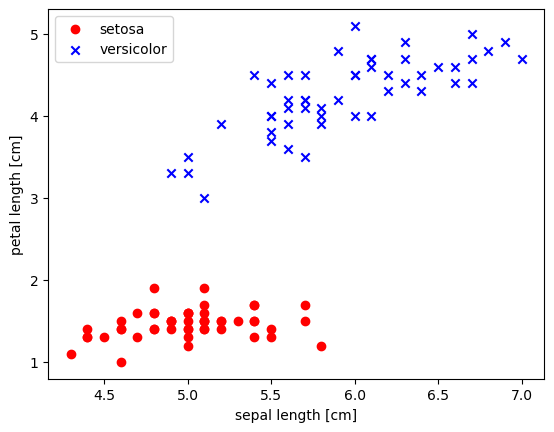

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1-100 行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosa を-1, Iris-vesicolor を1 に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1 - 100 行目の1, 3 列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setosa のプロット（赤の◯）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolor のプロット（青の×）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()


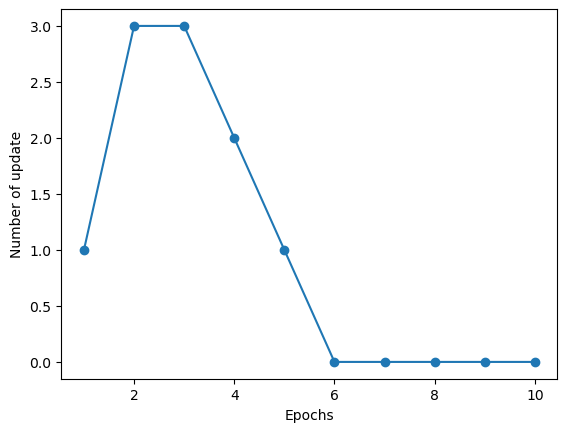

In [22]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# 訓練データへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
# 図の表示
plt.show()

In [32]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[: , 0].min() - 1, X[: , 0].max() + 1
    x2_min, x2_max = X[: , 1].min() - 1, X[: , 1].max() + 1
    # グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                               np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                          y=X[y == cl, 1],
                          alpha=0.8,
                          c=colors[idx],
                          marker=markers[idx],
                          label=cl,
                          edgecolor='black')

/var/folders/f4/t879k8cn5kj8f8jx1_jvr7bc0000gn/T/ipykernel_28086/4274237919.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


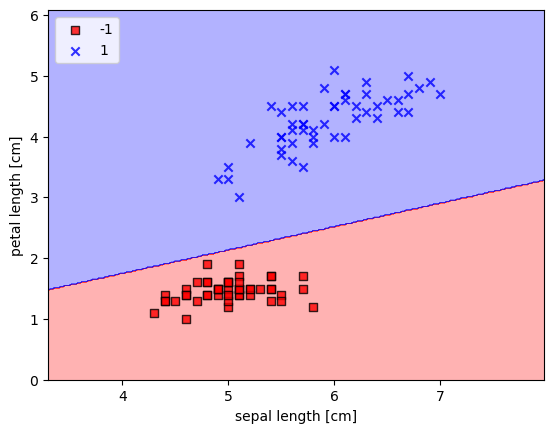

In [33]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [43]:
print(ppn.predict(X[0]))

-1
